In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DATA_FOLDER = 'data'
RESULTS_FOLDER = 'write'

results_file = f'{RESULTS_FOLDER}/gse75688.h5ad'

# Reading Dataset

In [3]:
df_info = pd.read_csv(f'{DATA_FOLDER}/GSE75688_final_sample_information.txt.gz', sep='\t')
df_info = df_info.rename(columns={'index': 'is_tumor'})
df_info

,sample,type,is_tumor,index2,index3
0,BC01_02,SC,Tumor,Tumor,Tumor
1,BC01_03,SC,Tumor,Tumor,Tumor
2,BC01_04,SC,Tumor,Tumor,Tumor
3,BC01_05,SC,Tumor,Tumor,Tumor
4,BC01_06,SC,Tumor,Tumor,Tumor
...,...,...,...,...,...
523,BC06_58,SC,nonTumor,Immune,Bcell
524,BC06_60,SC,Tumor,Tumor,Tumor
525,BC06_61,SC,nonTumor,Immune,Bcell
526,BC06_74,SC,Tumor,Tumor,Tumor


In [4]:
df_info.sample

<bound method NDFrame.sample of           sample  type  is_tumor  index2  index3
0        BC01_02    SC     Tumor   Tumor   Tumor
1        BC01_03    SC     Tumor   Tumor   Tumor
2        BC01_04    SC     Tumor   Tumor   Tumor
3        BC01_05    SC     Tumor   Tumor   Tumor
4        BC01_06    SC     Tumor   Tumor   Tumor
..           ...   ...       ...     ...     ...
523      BC06_58    SC  nonTumor  Immune   Bcell
524      BC06_60    SC     Tumor   Tumor   Tumor
525      BC06_61    SC  nonTumor  Immune   Bcell
526      BC06_74    SC     Tumor   Tumor   Tumor
527  BC06_Pooled  Bulk  nonTumor  Immune  Immune

[528 rows x 5 columns]>

In [5]:
df_info['is_tumor'].value_counts()

Tumor       326
nonTumor    202
Name: is_tumor, dtype: int64

In [6]:
df = pd.read_csv(f'{DATA_FOLDER}/GSE75688_GEO_processed_Breast_Cancer_raw_TPM_matrix.txt.gz', sep='\t')
df

,gene_id,gene_name,gene_type,BC01_Pooled,BC01_Tumor,BC02_Pooled,BC03_Pooled,BC03LN_Pooled,BC04_Pooled,BC05_Pooled,...,BC11_04,BC11_07,BC11_28,BC11_43,BC11_56,BC11_69,BC11_70,BC11_78,BC11_81,BC11_88
0,ENSG00000000003.10,TSPAN6,protein_coding,2.33,1.25,43.96,7.64,9.32,133.37,84.77,...,0.00,47.44,16.11,0.00,6.56,0.00,0.00,0.00,200.82,0.00
1,ENSG00000000005.5,TNMD,protein_coding,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,ENSG00000000419.8,DPM1,protein_coding,60.70,28.44,74.73,41.41,87.69,120.41,70.67,...,198.96,0.00,0.00,20.63,0.00,0.00,0.00,136.07,22.03,204.58
3,ENSG00000000457.9,SCYL3,protein_coding,47.93,4.43,9.89,7.61,7.32,12.42,12.02,...,0.00,10.96,0.00,0.00,0.00,0.27,0.00,0.07,0.19,9.52
4,ENSG00000000460.12,C1orf112,protein_coding,4.79,1.67,10.87,0.92,15.13,17.10,5.69,...,0.00,6.97,9.02,0.00,0.00,0.14,247.69,22.60,11.35,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57910,ERCC-00170,ERCC-00170,ERCC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
57911,ERCC-00171,ERCC-00171,ERCC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
57912,SPIKE1,EC2,SPIKE_IN,14940.70,45728.19,10442.91,94250.71,40823.13,24540.58,12613.85,...,166346.51,54443.35,120842.89,135291.06,138048.60,58840.26,65246.34,33465.11,108901.35,57492.01
57913,SPIKE2,EC15,SPIKE_IN,985.82,607.50,362.55,2949.35,1291.13,854.53,399.57,...,6860.84,2136.69,4048.09,4062.59,4147.05,2286.91,2821.49,1652.19,3439.53,1837.41


## Creating X and Y

In [7]:
# Selecting columns representing cells
samples = df.loc[:,'BC01_02':]

In [8]:
# Renaming columns with gene names
columns = samples.T.columns.values
gene_name_list = list(df['gene_name'])
columns_mapping = dict(zip(columns, gene_name_list))
samples = samples.T.rename(columns=columns_mapping)

In [9]:
# Merging  features (gene expressions) and labels (index = is_cancer)
labels = df_info.set_index(df_info['sample'])['is_tumor']
samples = samples.merge(labels.to_frame(), left_index=True, right_index=True)
samples

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,ERCC-00163,ERCC-00164,ERCC-00165,ERCC-00168,ERCC-00170,ERCC-00171,EC2,EC15,EC18,is_tumor
BC01_02,0.00,0.0,50.73,3.28,0.00,0.0,0.00,9.64,2.87,0.77,...,0.0,0.0,0.0,0.0,0.0,0.0,18414.34,537.11,0.0,Tumor
BC01_03,0.00,0.0,120.46,0.81,13.42,0.0,0.00,36.36,5.02,1.08,...,0.0,0.0,0.0,0.0,0.0,0.0,19603.44,653.27,0.0,Tumor
BC01_04,0.00,0.0,6.97,92.23,0.34,0.0,0.00,0.00,108.11,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,28523.94,916.42,0.0,Tumor
BC01_05,0.00,0.0,180.85,6.44,0.26,0.0,0.00,0.00,2.32,0.37,...,0.0,0.0,0.0,0.0,0.0,0.0,31210.57,961.37,0.0,Tumor
BC01_06,0.00,0.0,32.09,59.78,0.00,0.0,0.33,8.42,52.59,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,48684.49,2052.48,0.0,Tumor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BC11_69,0.00,0.0,0.00,0.27,0.14,0.0,0.00,7.06,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,58840.26,2286.91,0.0,Tumor
BC11_70,0.00,0.0,0.00,0.00,247.69,0.0,0.81,4.49,0.00,53.21,...,0.0,0.0,0.0,0.0,0.0,0.0,65246.34,2821.49,0.0,Tumor
BC11_78,0.00,0.0,136.07,0.07,22.60,0.0,0.83,0.82,70.26,0.96,...,0.0,0.0,0.0,0.0,0.0,0.0,33465.11,1652.19,0.0,Tumor
BC11_81,200.82,0.0,22.03,0.19,11.35,0.0,0.00,4.32,1.12,6.15,...,0.0,0.0,0.0,0.0,0.0,0.0,108901.35,3439.53,0.0,Tumor


In [10]:
x = samples.iloc[:,:-1]
# y = samples.is_tumor.replace({'Tumor': 1, 'nonTumor': 0})
y = samples.is_tumor.replace({'Tumor': 0, 'nonTumor': 1})

In [11]:
x

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,ERCC-00162,ERCC-00163,ERCC-00164,ERCC-00165,ERCC-00168,ERCC-00170,ERCC-00171,EC2,EC15,EC18
BC01_02,0.00,0.0,50.73,3.28,0.00,0.0,0.00,9.64,2.87,0.77,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18414.34,537.11,0.0
BC01_03,0.00,0.0,120.46,0.81,13.42,0.0,0.00,36.36,5.02,1.08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19603.44,653.27,0.0
BC01_04,0.00,0.0,6.97,92.23,0.34,0.0,0.00,0.00,108.11,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28523.94,916.42,0.0
BC01_05,0.00,0.0,180.85,6.44,0.26,0.0,0.00,0.00,2.32,0.37,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31210.57,961.37,0.0
BC01_06,0.00,0.0,32.09,59.78,0.00,0.0,0.33,8.42,52.59,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48684.49,2052.48,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BC11_69,0.00,0.0,0.00,0.27,0.14,0.0,0.00,7.06,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58840.26,2286.91,0.0
BC11_70,0.00,0.0,0.00,0.00,247.69,0.0,0.81,4.49,0.00,53.21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65246.34,2821.49,0.0
BC11_78,0.00,0.0,136.07,0.07,22.60,0.0,0.83,0.82,70.26,0.96,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33465.11,1652.19,0.0
BC11_81,200.82,0.0,22.03,0.19,11.35,0.0,0.00,4.32,1.12,6.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108901.35,3439.53,0.0


In [12]:
y

BC01_02    0
BC01_03    0
BC01_04    0
BC01_05    0
BC01_06    0
          ..
BC11_69    0
BC11_70    0
BC11_78    0
BC11_81    0
BC11_88    0
Name: is_tumor, Length: 515, dtype: int64

In [13]:
y.value_counts()

0    317
1    198
Name: is_tumor, dtype: int64

# Model Training

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, f1_score, homogeneity_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

## Pipeline 1

1. StandardScaler
2. PCA
3. KMeans(K=2)

In [15]:
random_state = 0
pca_n_components = 50
kmeans_n_clusters = 2
test_size_percentage = 0.3

In [16]:
x = samples.iloc[:,:-1]
y = samples.is_tumor.replace({'Tumor': 0, 'nonTumor': 1})
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size_percentage, stratify=y, random_state=random_state)

### StandardScaler

In [17]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train1 = scaler.transform(x_train)
x_train1.shape

(360, 57915)

### PCA

#### Defining number of components

In [18]:
pca_elbow = PCA(n_components=300, random_state=random_state)
pca_elbow.fit(x_train1)

PCA(n_components=300, random_state=0)

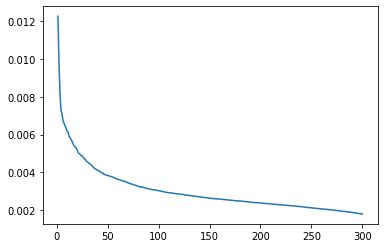

In [19]:
variance = pca_elbow.explained_variance_ratio_
number_of_components = np.arange(1, variance.shape[0]+1)
plt.plot(number_of_components, variance)

In [20]:
# Gets the number of components that explain 90% of the variance
def get_number_of_components_by_variance(variance_percentages, target_variance=0.9):
    i = 0
    acc = 0
    while acc < target_variance:
        acc += variance_percentages[i]
        i += 1
    return i

pca_n_components = get_number_of_components_by_variance(pca_elbow.explained_variance_ratio_)
pca_n_components

295

#### Applying PCA

In [21]:
pca = PCA(n_components=pca_n_components, random_state=random_state)
print(pca)
pca.fit(x_train1)
x_train1 = pca.transform(x_train1)
x_train1.shape

PCA(n_components=295, random_state=0)


(360, 295)

### KMeans

In [22]:
kmeans = KMeans(n_clusters=kmeans_n_clusters, random_state=random_state)
kmeans.fit(x_train1)
y_train_pred1 = kmeans.labels_ # kmeans.labels_ == kmeans.predict(x)

### Metrics

#### Train

In [23]:
train_accuracy = accuracy_score(y_train, y_train_pred1)
train_f1 = f1_score(y_train, y_train_pred1)
train_homogeneity = homogeneity_score(y_train, y_train_pred1)

print('Train metrics')
print(f'Accuracy: {train_accuracy}')
print(f'F1: {train_f1}')
print(f'Homogeneity: {train_homogeneity}')

# Train metrics
# Accuracy: 0.9361111111111111
# F1: 0.911196911196911
# Homogeneity: 0.654453535015388

Train metrics
Accuracy: 0.9444444444444444
F1: 0.9224806201550387
Homogeneity: 0.6987241880137632


#### Test

In [24]:
x_test1 = scaler.transform(x_test)
x_test1 = pca.transform(x_test1)
y_test_pred1 = kmeans.predict(x_test1)


In [25]:
test_accuracy1 = accuracy_score(y_test, y_test_pred1)
test_f11 = f1_score(y_test, y_test_pred1)
test_homogeneity1 = homogeneity_score(y_test, y_test_pred1)

print('Test metrics')
print(f'Accuracy: {test_accuracy1}')
print(f'F1: {test_f11}')
print(f'Homogeneity: {test_homogeneity1}')

Test metrics
Accuracy: 0.8709677419354839
F1: 0.8181818181818182
Homogeneity: 0.4266286683116515


### Pipeline

In [26]:
# Pipeline
x = samples.iloc[:,:-1]
y = samples.is_tumor.replace({'Tumor': 0, 'nonTumor': 1})
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size_percentage, stratify=y, random_state=random_state)

p = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=pca_n_components, random_state=random_state)),
    ('kmeans', KMeans(n_clusters=kmeans_n_clusters, random_state=random_state))
])

p.fit(x_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('pca', PCA(n_components=295, random_state=0)),
                ('kmeans', KMeans(n_clusters=2, random_state=0))])

In [27]:
py_pred_train = p.predict(x_train)
py_pred_test = p.predict(x_test)

train_accuracy = accuracy_score(y_train, py_pred_train)
train_f1 = f1_score(y_train, py_pred_train)
train_homogeneity = homogeneity_score(y_train, py_pred_train)

print('Train metrics')
print(f'Accuracy: {train_accuracy}')
print(f'F1: {train_f1}')
print(f'Homogeneity: {train_homogeneity}')

test_accuracy1 = accuracy_score(y_test, py_pred_test)
test_f11 = f1_score(y_test, py_pred_test)
test_homogeneity1 = homogeneity_score(y_test, py_pred_test)

print('Test metrics')
print(f'Accuracy: {test_accuracy1}')
print(f'F1: {test_f11}')
print(f'Homogeneity: {test_homogeneity1}')

Train metrics
Accuracy: 0.9444444444444444
F1: 0.9224806201550387
Homogeneity: 0.6987241880137632
Test metrics
Accuracy: 0.8709677419354839
F1: 0.8181818181818182
Homogeneity: 0.4266286683116515


### Ablation

#### Removing Scaler

In [28]:
# Resetting entries
x_train1 = x_train
print(x_train1.shape)

pca = PCA(n_components=pca_n_components, random_state=random_state)
pca.fit(x_train1)
x_train1 = pca.transform(x_train1)

kmeans = KMeans(n_clusters=kmeans_n_clusters, random_state=random_state)
kmeans.fit(x_train1)
y_train_pred1_ablation1 = kmeans.labels_

(360, 57915)


In [29]:
train_accuracy_ablation1 = accuracy_score(y_train, y_train_pred1_ablation1)
train_f1_ablation1 = f1_score(y_train, y_train_pred1)
train_homogeneity_ablation1 = homogeneity_score(y_train, y_train_pred1)

print('Train metrics')
print(f'Accuracy: {train_accuracy_ablation1}')
print(f'F1: {train_f1_ablation1}')
print(f'Homogeneity: {train_homogeneity_ablation1}')

Train metrics
Accuracy: 0.7527777777777778
F1: 0.9224806201550387
Homogeneity: 0.6987241880137632


In [30]:
test_accuracy1_ablation_1 = accuracy_score(y_test, y_test_pred1)
test_f11_ablation_1 = f1_score(y_test, y_test_pred1)
test_homogeneity1_ablation_1 = homogeneity_score(y_test, y_test_pred1)

print('Test metrics')
print(f'Accuracy: {test_accuracy1}')
print(f'F1: {test_f11}')
print(f'Homogeneity: {test_homogeneity1}')

Test metrics
Accuracy: 0.8709677419354839
F1: 0.8181818181818182
Homogeneity: 0.4266286683116515


## Pipeline 2